In [37]:
#Importamos las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [126]:
df_house = pd.read_csv('house_train_raw.csv')

In [127]:
df_house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


c:\Users\Nelson\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


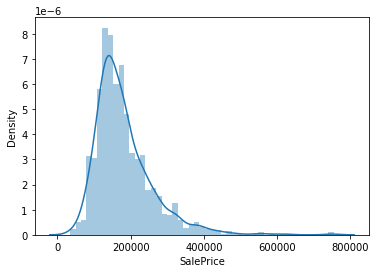

In [128]:
#graficamos el histograma del salerprice
sns.distplot(df_house['SalePrice'])
plt.show()


In [129]:
#Separamos las variables categoricas y las variables numericas
df_house_cat = df_house.select_dtypes(include=['object'])
df_house_num = df_house.select_dtypes(include=['int64','float64'])


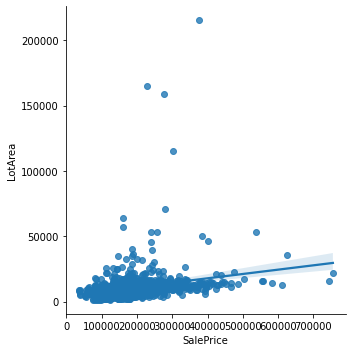

In [130]:
#graficamos la dispersion del salerprice con respecto al area del lote
tips = df_house_num
g = sns.lmplot(x='SalePrice', y='LotArea', data=tips)

In [131]:
#corroboramos las dimensiones del dataframe
df_house_cat.shape

(1460, 43)

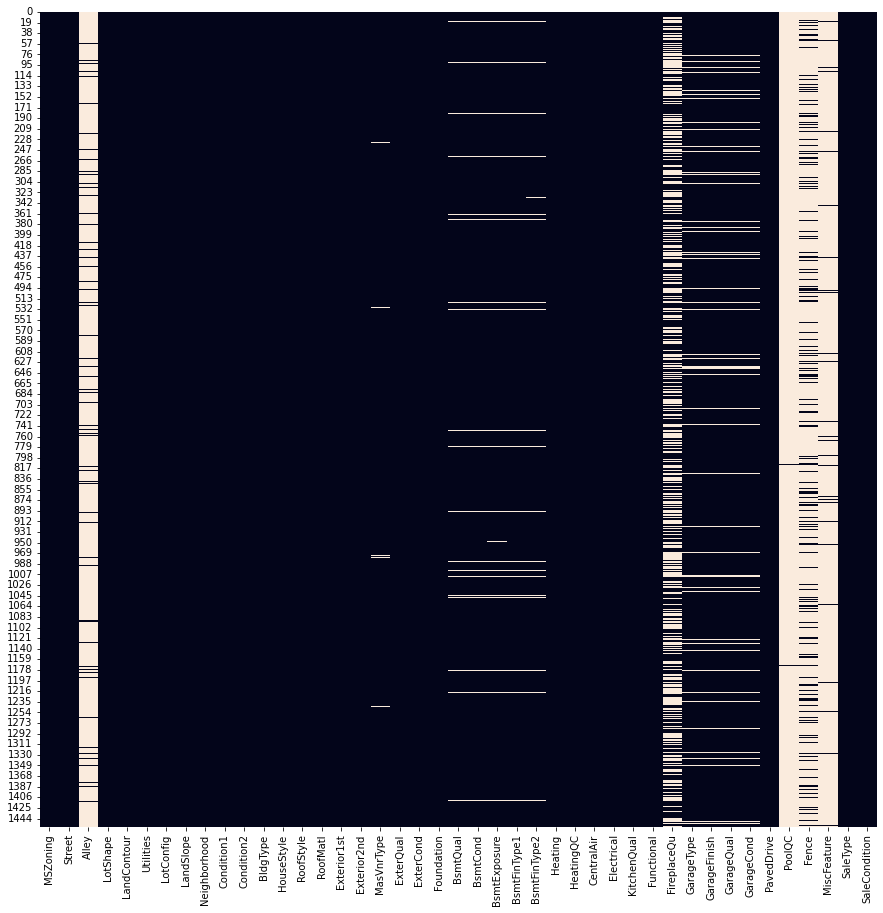

In [132]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_cat.isnull(), cbar=False)
plt.show()

Cada linea blanca indica un valor nulo, imputamos esos valores a continuacion.

In [133]:
#eliminamos las filas con mayor cantidad de valores nulos
df_house_cat=df_house_cat.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

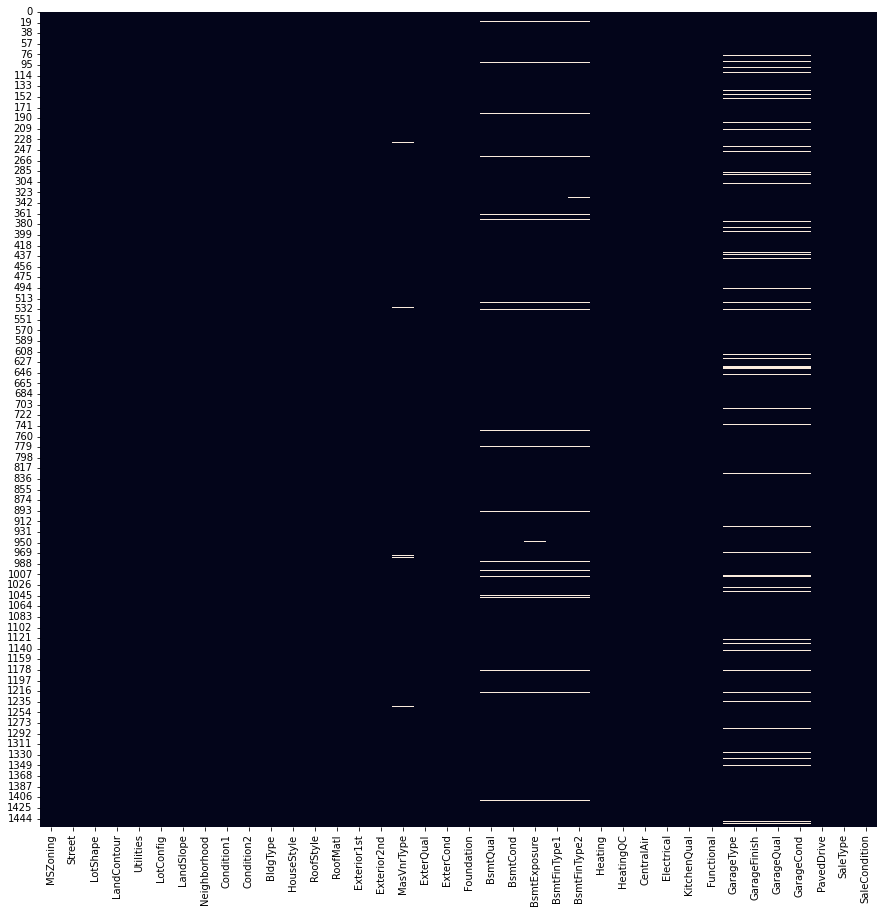

In [134]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_cat.isnull(), cbar=False)
plt.show()

Cada linea blanca indica un valor nulo, imputamos esos valores a continuacion.

In [135]:
#corroboramos las dimensiones del dataframe
df_house_cat.shape

(1460, 38)

In [136]:
#imputamos nan a los valores nulos
df_house_cat=df_house_cat.fillna('None')


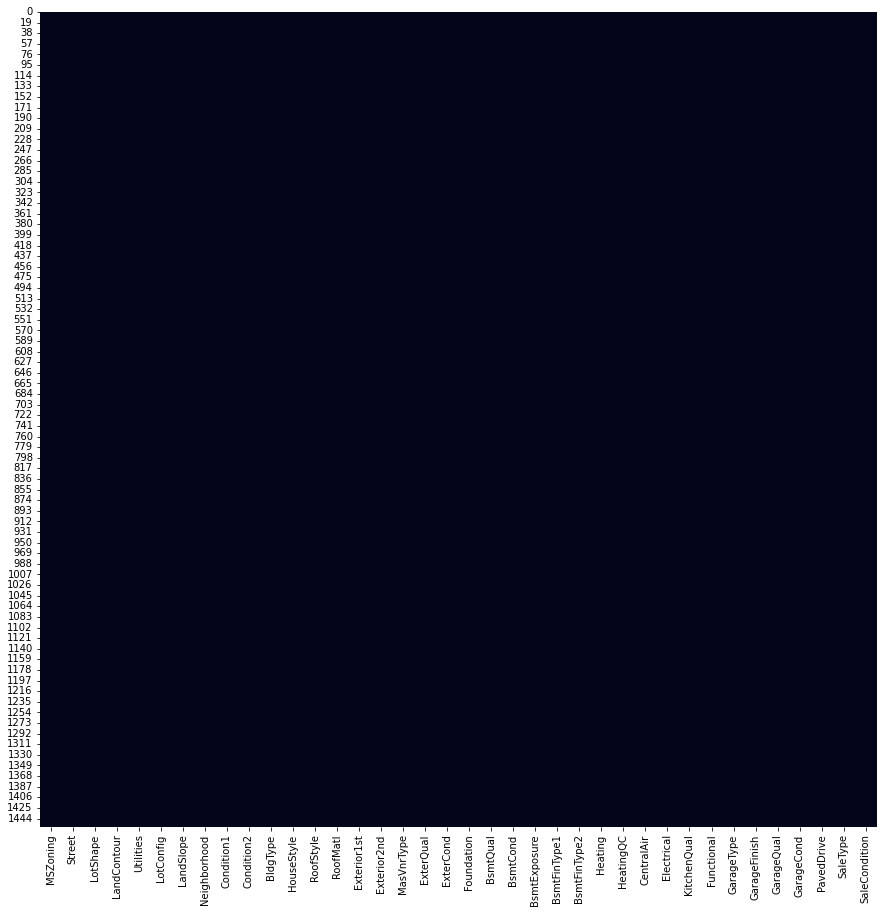

In [137]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_cat.isnull(), cbar=False)
plt.show()

Podemos observar el dataframe sin valores nulos

In [50]:
df_house_cat.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [51]:
df_house_num.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


In [138]:
#imputamos los valores medios de las variables numericas
df_house_num.fillna(df_house_num.mean(), inplace=True)
df_house_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

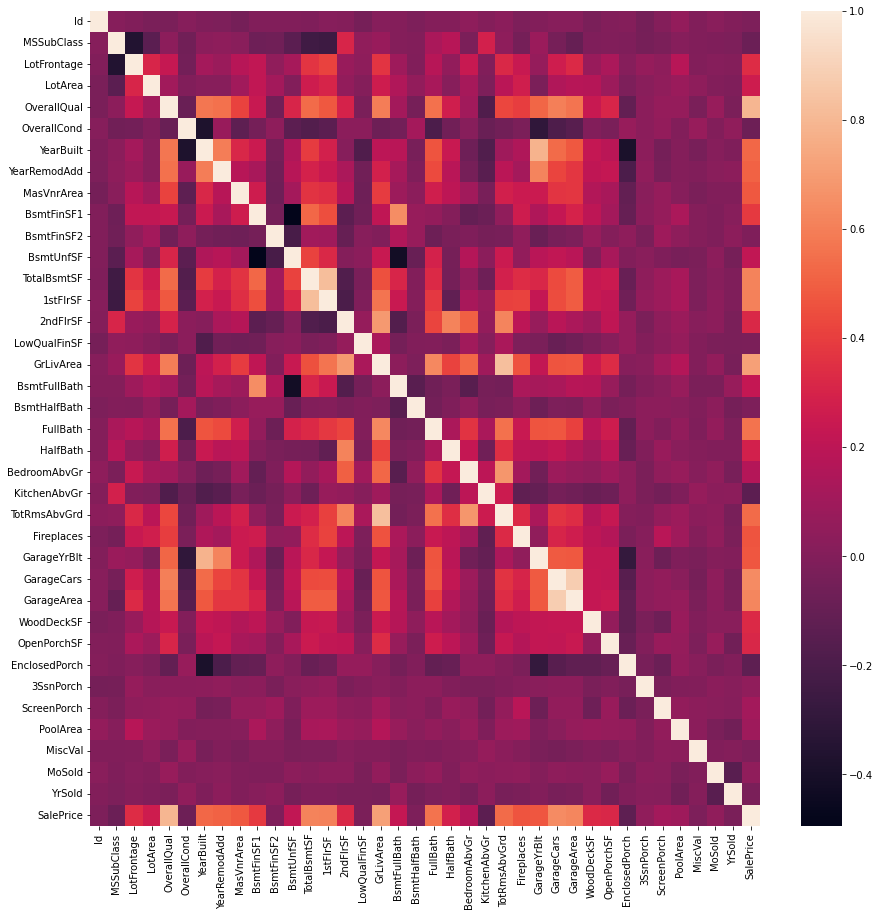

In [139]:
#graficamos el heatmap de la matriz de correlacion
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_house_num.corr())
plt.show()


In [140]:
#Ordenamos las variables por el grado de correlacion que tienen con el target
cor= df_house_num[:].corr()
cor=cor.sort_values(['SalePrice'],ascending=False)


In [144]:
cor.SalePrice.head(28)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
Name: SalePrice, dtype: float64

## Probamos el modelo random forest classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
#Creamos el dataframe de features que vamos a utilizar y el de target
df_features_num = df_house_num[['OverallQual','GrLivArea','GarageArea','GarageCars',
'TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt',
'Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','LotFrontage','WoodDeckSF',
'2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF',
'BedroomAbvGr','ScreenPorch']]

df_target_num = df_house_num['SalePrice']

In [151]:
#imputamos los valores medios de las variables numericas
df_features_num.fillna(df_features_num.mean(), inplace=True)
df_features_num.isnull().sum()

C:\Users\Nelson\AppData\Local\Temp\ipykernel_10416\554733895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_num.fillna(df_features_num.mean(), inplace=True)


OverallQual     0
GrLivArea       0
GarageArea      0
GarageCars      0
TotalBsmtSF     0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
Fireplaces      0
1stFlrSF        0
MasVnrArea      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
LotArea         0
BsmtFullBath    0
BsmtUnfSF       0
BedroomAbvGr    0
ScreenPorch     0
dtype: int64

In [152]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_features_num
y = df_target_num

In [153]:
#creamos los grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [154]:
#instanciamos el modelo y lo entrenamos
clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

In [155]:
#evaluamos el desempeño del modelo en el conjunto de prueba
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9980430528375733
0.01141552511415525


In [156]:
clf.score(X_train,y_train)

0.9980430528375733

In [157]:
RMSLE = mean_squared_log_error(y_test, y_test_pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.19232932921245188


In [158]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test,  y_test_pred)

23196.53196347032

#### Podemos ver que el accuracy_score es alto para el conjunto de entrenamiento pero bajo para el conjunto de testeo, eso podria indicar que el modelo esta en overfitting.

## Probamos el modelo Random Forest Regressor

In [159]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_features_num
y = df_target_num

In [160]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
#Instanciamos el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
#entrenamos el modelo
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [162]:
model.predict(X_test)

array([142106.5       , 317938.77      , 111480.5       , 159331.        ,
       318988.55      ,  80554.5       , 210493.13      , 149735.4       ,
        78886.5       , 123903.34      , 154437.4       , 122466.49      ,
       102397.        , 206509.16      , 178027.        , 127693.5       ,
       197671.        , 135533.75      , 111610.        , 204015.53      ,
       166380.1       , 226084.32      , 175589.79      , 124528.75      ,
       190342.8       , 173543.45      , 180879.32      , 105158.        ,
       176922.87      , 191967.21      , 121710.92      , 250412.53      ,
       175395.03      , 109145.        , 265733.67      , 145930.5       ,
       147702.38      , 208173.07      , 310399.42      , 105347.49      ,
       122032.5       , 235331.46      , 122568.        , 353293.57      ,
       135370.5       , 154711.2       , 107553.44      , 126384.26      ,
       399972.32      , 149610.86      , 117486.99      , 187302.        ,
       122109.36      , 3

In [163]:
#verivicamos el rendimiento del modelo
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.8910468525614


In [164]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = model.predict(X_test)

In [166]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred, squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.16066251286796643


In [167]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

18480.964372146118

In [168]:
RMSE=mean_squared_error(y_test, y_pred, squared=False)
print('Error medio: ', RMSE) 

Error medio:  28908.583191741098


C:\Users\Nelson\AppData\Local\Temp\ipykernel_10416\3349173427.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')


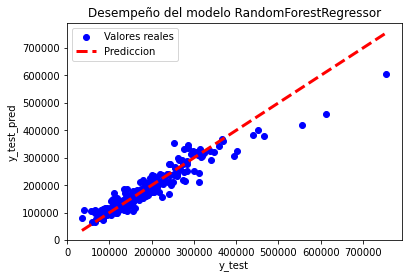

In [169]:
#graficamos el desempeño del modelo RandomForestRegressor 
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo RandomForestRegressor')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

## Probamos el modelo Lasso de regresion

In [170]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_features_num
y = df_target_num

In [171]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
#instanciamos el modelo
lasso = Lasso()

In [173]:
#entrenamos el modelo
lasso.fit(X_train, y_train)

c:\Users\Nelson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.041e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [174]:
#Predecimos los valores
predict = lasso.predict(X_test)

In [175]:
lasso.score(X_test, y_test)

0.8151709758784537

In [176]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = lasso.predict(X_test)

In [177]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred, squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.19873555078582875


In [178]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

23469.74329819979

C:\Users\Nelson\AppData\Local\Temp\ipykernel_10416\3121448600.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')


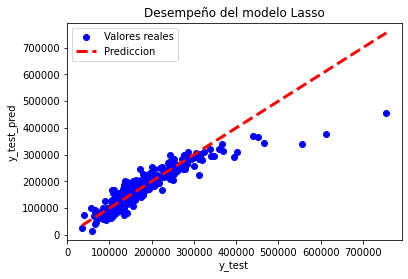

In [179]:
#graficamos el desempeño del modelo de regresion Lasso 
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo Lasso')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

## Vamos a trabajar con un dataframe sin nulos y con todas las columnas (CATEGORICAS Y NUMERICAS)


In [270]:
#concatenamos los df numericos y categoricos sin nulos 
df_house_sin_nulos = pd.concat([df_house_num, df_house_cat], axis=1)

In [271]:
df_house_sin_nulos.shape

(1460, 76)

In [86]:
#eliminamos las varaibles categoricas que no utilizaremos
#df_house_sin_nulos = df_house_sin_nulos.drop(['LotShape', 'LandSlope', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish'], axis=1)

In [272]:
df_house_sin_nulos.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [273]:
#Codificamos las variables categoricas para aplicar el modelo de regresion 
for col in df_house_sin_nulos.columns:
  if(df_house_sin_nulos[col].dtype == 'object'):
      le=LabelEncoder()
      df_house_sin_nulos[col]=le.fit_transform(df_house_sin_nulos[col])

In [274]:
df_house_sin_nulos.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,5,2,6,1,2,5,5,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,5,3,6,1,2,5,5,2,8,4


In [275]:
#Ordenamos las variables por el grado de correlacion que tienen con el target
cor= df_house_sin_nulos[:].corr()
cor=cor.sort_values(['SalePrice'],ascending=False)


In [276]:

cor.SalePrice.head(42)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
GarageCond       0.246705
Electrical       0.237044
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
GarageQual       0.205963
HouseStyle       0.180163
BedroomAbvGr     0.168213
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
ScreenPorch      0.111447
Exterior2nd 

<AxesSubplot:>

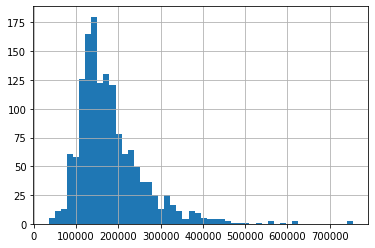

In [278]:
df_house_sin_nulos['SalePrice'].hist(bins=50)

In [286]:
#Tomamos todas las variables 
#y definimos las features que vamos a utilizar y el target
df_house_feat = df_house_sin_nulos.drop(['SalePrice'], axis=1)

df_house_target = df_house_sin_nulos['SalePrice']


### Aplicamos el modelo que nos dio menor error

In [280]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_house_feat, df_house_target, test_size=0.2, random_state=42)

In [281]:
#Instanciamos el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=800, random_state=42)
#entrenamos el modelo
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=800, random_state=42)

In [282]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = model.predict(X_test)
y_pred

array([140404.34375, 320120.75375, 115580.7525 , 164544.9125 ,
       321382.92625,  85235.83625, 212711.00875, 152874.10375,
        86584.6675 , 129515.6975 , 155181.32125, 121837.06   ,
       110009.0125 , 209272.8225 , 178264.95625, 130729.625  ,
       195610.685  , 135079.09375, 115803.15625, 206460.12375,
       158515.31   , 222818.3275 , 178008.735  , 124958.76375,
       194878.93625, 173797.71375, 184197.32625, 106403.18625,
       176943.33625, 193528.01   , 125165.17   , 248404.9625 ,
       178284.90875, 112344.5625 , 257435.13875, 146838.0775 ,
       138541.94   , 204731.4275 , 311239.19375, 105203.695  ,
       122254.16125, 235587.23   , 120846.8    , 369415.40375,
       132180.36875, 146608.00125, 116508.33625, 128345.14625,
       391505.54375, 146405.31125, 122497.0725 , 194761.7975 ,
       124542.3575 , 360083.4325 , 140297.5575 , 239995.3175 ,
       197849.345  , 152487.2725 , 145656.395  , 113894.66125,
        78664.1875 , 146268.425  , 310624.54125, 281176

In [283]:
#verivicamos el rendimiento del modelo
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.8929634159198333


In [284]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.15277654881478267


In [285]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

17469.004293664384

C:\Users\Nelson\AppData\Local\Temp\ipykernel_10416\2037014182.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')


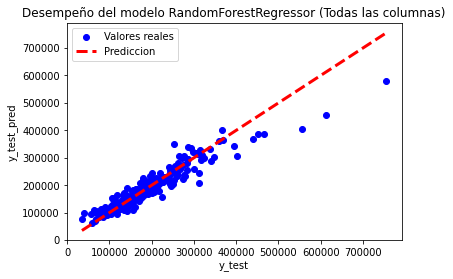

In [100]:
#graficamos el desempeño del modelo de regresion RandomForestRegressor con todas las columnas
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo RandomForestRegressor (Todas las columnas)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

# Probamos el modelo de regresion XGBoost

In [287]:
#Importamos el modelo xgboost
import xgboost as xgb

In [288]:
#definimos los conjuntos de features y target
df_house_feat = df_house_sin_nulos.drop(['SalePrice'], axis=1)

df_house_target = df_house_sin_nulos['SalePrice']

In [289]:
#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_house_feat, df_house_target, test_size=0.3, random_state=42)

In [290]:
X_train.shape

(1022, 75)

In [291]:
#instanciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


In [292]:
#entrenamos el modelo
model_xgb.fit(X_train,y_train)


[19:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4603,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0468, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             predictor='auto', random_state=7, reg_alpha=0.464, ...)

In [293]:
#obtenemos la prediccion
pred=model_xgb.predict(X_test)


In [294]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.12792078049749317


Obtuvimos un mejor rendimiento de este modelo XGBoost...

# Probamos el modelo con el dataset de teteso

In [295]:
#cargamos el dataframe de test
df_test =pd.read_csv('houses_test_raw.csv')

In [296]:
#Seleccionamos las columnas que vamos a utilizar para la prediccion
df_test_res = df_test[['OverallQual','GarageArea','GarageCars',
'TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd',
'Fireplaces','1stFlrSF','MasVnrArea','BsmtFinSF1','GarageYrBlt','Foundation','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF',
'HalfBath','LotArea','CentralAir','GarageCond','Electrical','PavedDrive','BsmtFullBath',
'RoofStyle','BsmtUnfSF','SaleCondition','Neighborhood','GarageQual','HouseStyle',
'BedroomAbvGr','ExterCond','Functional','ScreenPorch','PoolArea']]

In [297]:
#eliminamos las columnas que tienen muchos valores nulos
df_test_res = df_test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [298]:
df_test_res.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal


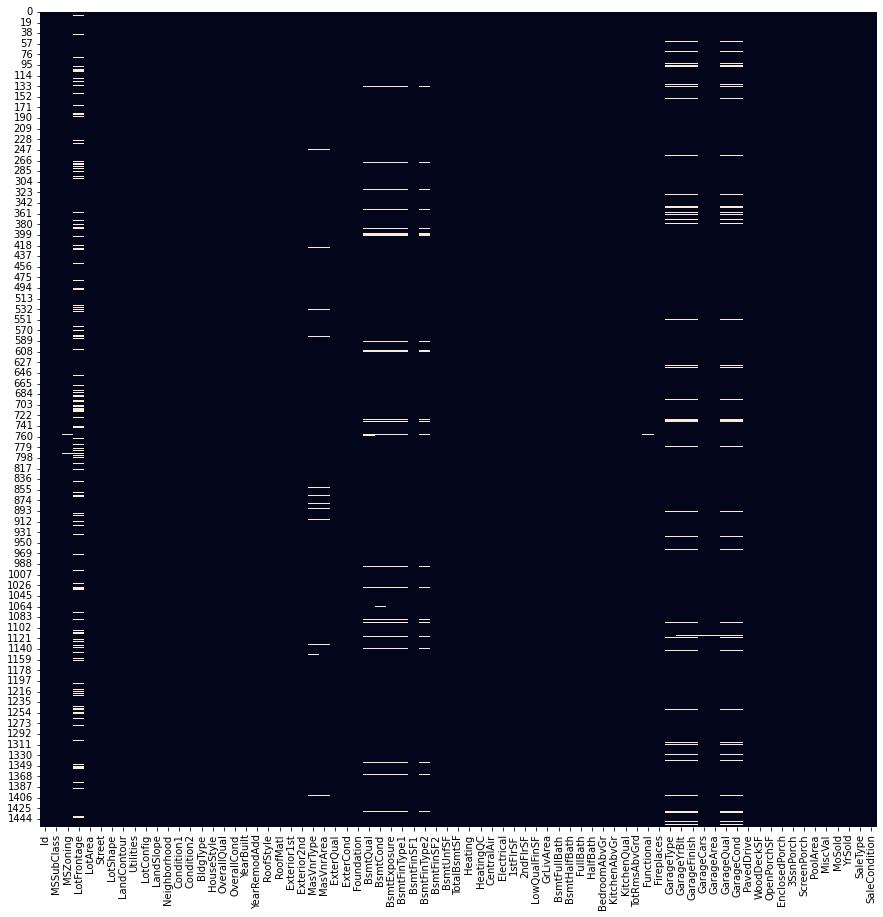

In [299]:
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_test_res.isnull(), cbar=False)
plt.show()

Cada linea blanca indica un valor nulo, imputamos esos valores a continuacion.

In [300]:
#imputamos los valores medios de las variables numericas
df_test_res.fillna(df_test_res.mean(), inplace=True)
df_test_res.isnull().sum()

C:\Users\Nelson\AppData\Local\Temp\ipykernel_10416\2190033448.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_test_res.fillna(df_test_res.mean(), inplace=True)


Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 75, dtype: int64

In [301]:
#imputamos nan a los valores nulos a las features categoricas
df_test_res=df_test_res.fillna('None')


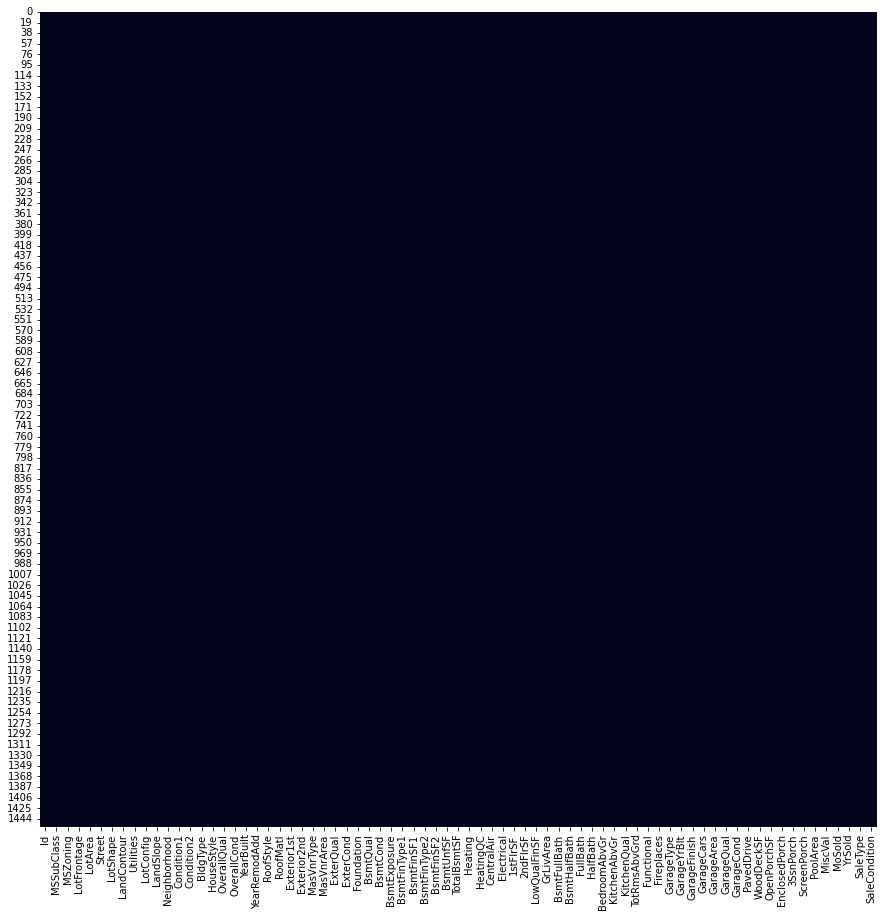

In [302]:
#Volvemos a observar graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_test_res.isnull(), cbar=False)
plt.show()

Podemos ver que tenemos un dataframe sin datos nulos 

In [303]:
df_test_res.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

Todavia tenemos variables categoricas, vamos a utilizar LabelEncoder para codificarlas 

In [304]:
df_test_res.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal


In [305]:
#Codificamos las variables categoricas para aplicar el modelo de regresion 
for col in df_test_res.columns:
  if(df_test_res[col].dtype == 'object'):
      le=LabelEncoder()
      df_test_res[col]=le.fit_transform(df_test_res[col])

Vemos que ahora todas las caracteristicas son numericas

In [306]:
df_test_res.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,9,4
1,1462,20,4,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,9,4


Ahora estamos en condiciones de aplicar el modelo que mejor resultado nos dio

In [307]:
#obtenemos los valores predicho
df_resultado = model_xgb.predict(df_test_res)


In [308]:
pred_test = pd.DataFrame(df_resultado, columns= ['pred']) 

In [309]:
pred_test.to_csv('./pred_test.csv',index=False)